In [26]:
import numpy as np

import pandas as pd
from pandas.api.types import CategoricalDtype

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import re

# Race

In [27]:
final_tweets = pd.read_csv('r_d_tweets_3.csv')

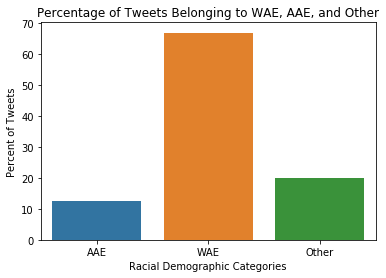

In [28]:
#find the percentage breakdown of the different dialect categories (AAE, WAE, other)

sns.barplot(x = "Racial Demographic (All)", y = "Racial Demographic (All)", data = final_tweets, 
            orient = "v", estimator = lambda x: len(x) / len(final_tweets) * 100)

plt.title("Percentage of Tweets Belonging to WAE, AAE, and Other")

plt.ylabel("Percent of Tweets")
plt.xlabel("Racial Demographic Categories")
plt.xticks(np.arange(3), ('AAE', 'WAE', 'Other'))

plt.show()

__Dialects__

In [29]:
wae = final_tweets[final_tweets['Racial Demographic (All)'] == 1]

counts_wae = wae.groupby("Type").count()
counts_wae = counts_wae.reset_index().rename(columns = {'Number of Votes': 'Count'})
counts_wae['Percentage'] = counts_wae['ID'] / sum(counts_wae['ID'])

counts_wae_p = np.array(counts_wae['Percentage'])

In [30]:
aae = final_tweets[final_tweets['Racial Demographic (All)'] == 0]

counts_aae = aae.groupby("Type").count()
counts_aae = counts_aae.reset_index().rename(columns = {'Number of Votes': 'Count'})
counts_aae['Percentage'] = counts_aae['ID'] / sum(counts_aae['ID'])

counts_aae_p = np.array(counts_aae['Percentage'])

In [31]:
other = final_tweets[(final_tweets['Racial Demographic (All)'] == 2)] 

counts_other = other.groupby("Type").count()
counts_other = counts_other.reset_index().rename(columns = {'Number of Votes': 'Count'})
counts_other['Percentage'] = counts_other['ID'] / sum(counts_other['ID'])

counts_other_p = np.array(counts_other['Percentage'])

In [83]:
all_tweets = final_tweets.groupby("Type").count()
all_tweets = all_tweets.reset_index().rename(columns = {'Number of Votes': 'Count'})
all_tweets['Percentage'] = all_tweets['ID'] / sum(all_tweets['ID'])

counts_all_p = np.array(all_tweets['Percentage'])

In [84]:
proportions = pd.DataFrame({"Type": counts_wae["Type"],
                            "All": counts_all_p,
                            "Other": counts_other_p,
                            "AAE": counts_aae_p,
                            "WAE": counts_wae_p
                            })
proportions

,Type,All,Other,AAE,WAE
0,abusive,0.271514,0.445228,0.588689,0.161798
1,hateful,0.049652,0.036098,0.118358,0.041144
2,normal,0.538537,0.367632,0.215081,0.650702
3,spam,0.140297,0.151042,0.077871,0.146356


In [34]:
new = pd.DataFrame({
                    "Abusive": proportions.iloc[0, [1, 2, 3, 4]],
                    "Hateful": proportions.iloc[1, [1, 2, 3, 4]],
                    "Normal": proportions.iloc[2, [1, 2, 3, 4]],
                    "Spam": proportions.iloc[3, [1, 2, 3, 4]]})
                  
new

,Abusive,Hateful,Normal,Spam
All,0.271514,0.0496525,0.538537,0.140297
Other,0.445228,0.0360982,0.367632,0.151042
AAE,0.588689,0.118358,0.215081,0.0778715
WAE,0.161798,0.041144,0.650702,0.146356


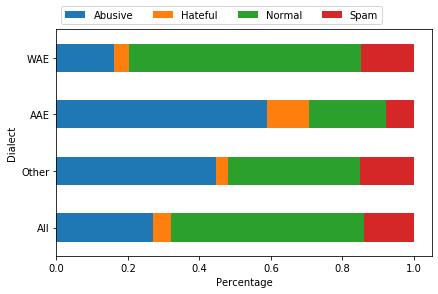

In [35]:
new.plot.barh(stacked = True)
plt.legend(ncol=4, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='medium')
plt.tight_layout()

plt.xlabel("Percentage")
plt.ylabel("Dialect")
#plt.title("Distribution of Types of Tweets Based on Racial Dialect")

plt.show()

# Race and Gender

In [37]:
url = 'https://raw.githubusercontent.com/jaeyk/bias-in-ml/master/twitter/processed_data/gender_predictions.csv?token=ANJYFSE4UUTO4JWENN3LG3S6V6TU4'
gender_cat = pd.read_csv(url, error_bad_lines=False)

In [38]:
gender = gender_cat.iloc[1:]
gender = gender.reset_index()
gender.head()

,index,Unnamed: 0,text,label,votes,logistic model results,male,female
0,1,1,rt @papapishu: man it would fucking rule if we...,abusive,4,male,1,0
1,2,2,it is time to draw close to him &#128591;&#127...,normal,4,neither,0,0
2,3,3,if you notice me start to act different or dis...,normal,5,female,0,1
3,4,4,"forget unfollowers, i believe in growing. 7 ne...",normal,3,both,1,1
4,5,5,rt @vitiligoprince: hate being sexually frustr...,abusive,4,female,0,1


In [44]:
race_gender = final_tweets

race_gender['Logistic Model Results'] = gender['logistic model results']
race_gender['Male'] = gender['male']
race_gender['Female'] = gender['female']

race_gender = race_gender.drop(columns = ['Racial Demographic (Two)'])
race_gender.head()

,ID,Tweet,Type,Number of Votes,Racial Demographic (All),Logistic Model Results,Male,Female
0,0,RT @Papapishu: Man it would fucking rule if we...,abusive,4,1.0,male,1,0
1,1,It is time to draw close to Him &#128591;&#127...,normal,4,1.0,neither,0,0
2,2,if you notice me start to act different or dis...,normal,5,0.0,female,0,1
3,3,"Forget unfollowers, I believe in growing. 7 ne...",normal,3,1.0,both,1,1
4,4,RT @Vitiligoprince: Hate Being sexually Frustr...,abusive,4,0.0,female,0,1


__White Male__

In [74]:
white_male = race_gender[race_gender['Racial Demographic (All)'] == 1]
white_male = white_male[white_male['Male'] == 1]

len(white_male)

15554

In [75]:
counts_wm = white_male.groupby("Type").count()
counts_wm = counts_wm.reset_index().rename(columns = {'Number of Votes': 'Count'})
counts_wm['Percentage'] = counts_wm['ID'] / sum(counts_wm['ID'])

counts_wm_p = np.array(counts_wm['Percentage'])

__Black Male__

In [76]:
black_male = race_gender[race_gender['Racial Demographic (All)'] == 0]
black_male = black_male[black_male['Male'] == 1]

len(black_male)

4746

In [77]:
counts_bm = black_male.groupby("Type").count()
counts_bm = counts_bm.reset_index().rename(columns = {'Number of Votes': 'Count'})
counts_bm['Percentage'] = counts_bm['ID'] / sum(counts_bm['ID'])

counts_bm_p = np.array(counts_bm['Percentage'])

__White Female__

In [78]:
white_female = race_gender[race_gender['Racial Demographic (All)'] == 1]
white_female = white_female[white_female['Female'] == 1]

len(white_female)

15587

In [79]:
counts_wf = white_female.groupby("Type").count()
counts_wf = counts_wf.reset_index().rename(columns = {'Number of Votes': 'Count'})
counts_wf['Percentage'] = counts_wf['ID'] / sum(counts_wf['ID'])

counts_wf_p = np.array(counts_wf['Percentage'])

__Black Female__

In [80]:
black_female = race_gender[race_gender['Racial Demographic (All)'] == 0]
black_female = black_female[black_female['Female'] == 1]

len(black_female)

3985

In [81]:
counts_bf = black_female.groupby("Type").count()
counts_bf = counts_bf.reset_index().rename(columns = {'Number of Votes': 'Count'})
counts_bf['Percentage'] = counts_bf['ID'] / sum(counts_bf['ID'])

counts_bf_p = np.array(counts_bf['Percentage'])

__Stacked Barplot__

In [82]:
proportions_rg = pd.DataFrame({"Type": counts_wae["Type"],
                            "White Male": counts_wm_p,
                            "White Female": counts_wf_p,
                            "Black Male": counts_bm_p,
                            "Black Female": counts_bf_p
                            })
proportions_rg

,Type,White Male,White Female,Black Male,Black Female
0,abusive,0.209914,0.243087,0.605141,0.675282
1,hateful,0.057670,0.044204,0.201854,0.088331
2,normal,0.675389,0.636235,0.168142,0.207528
3,spam,0.057027,0.076474,0.024863,0.028858


In [85]:
new_rg = pd.DataFrame({
                    "Abusive": proportions_rg.iloc[0, [1, 2, 3, 4]],
                    "Hateful": proportions_rg.iloc[1, [1, 2, 3, 4]],
                    "Normal": proportions_rg.iloc[2, [1, 2, 3, 4]],
                    "Spam": proportions_rg.iloc[3, [1, 2, 3, 4]]})
                  
new_rg

,Abusive,Hateful,Normal,Spam
White Male,0.209914,0.0576701,0.675389,0.0570271
White Female,0.243087,0.0442035,0.636235,0.076474
Black Male,0.605141,0.201854,0.168142,0.024863
Black Female,0.675282,0.0883312,0.207528,0.0288582


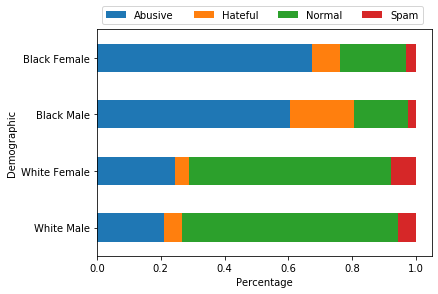

In [87]:
new_rg.plot.barh(stacked = True)
plt.legend(ncol=4, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='medium')
plt.tight_layout()

plt.xlabel("Percentage")
plt.ylabel("Demographic")

plt.show()